In [1]:
import pyaudio
import wave

In [99]:
#recording

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 5
filename = "output.wav"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


In [ ]:
#filename = 'output.wav'

# Set chunk size of 1024 samples per data frame
chunk = 1024  

# Open the sound file 
wf = wave.open('output.wav', 'rb')#'shift.wav'

# Create an interface to PortAudio
p = pyaudio.PyAudio()

# Open a .Stream object to write the WAV file to
# 'output = True' indicates that the sound will be played rather than recorded
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# Read data in chunks
data = wf.readframes(chunk)
# Play the sound by writing the audio data to the stream
while data != '':
    stream.write(data)
    data = wf.readframes(chunk)
# Close and terminate the stream
stream.close()
p.terminate()

In [84]:
import scipy.io.wavfile as wav
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [63]:
r,m = wav.read('output.wav')

# a=[1]
# c=np.arange(-2*np.pi,2*np.pi,4*np.pi/4096)
# w,M=sig.freqz(m,a)
# print(len(M))
win = np.hanning(len(m))
print(len(m))
m1 = np.array(m[:,:1],dtype = np.int16)
print(m1[67654])
M = np.fft.fft(m1)
# plt.plot(abs(M))
# plt.show()

88064
[334]


MemoryError: 

(440320, 2)


c:\users\sahith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


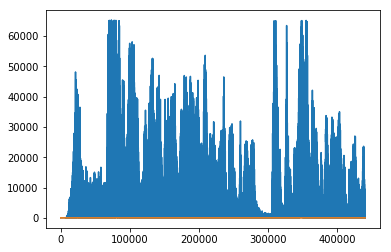

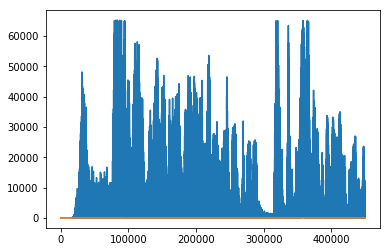

In [121]:
M1 = np.zeros((len(M)+10000,2))
n=np.arange(0,len(M))
n1=np.arange(0,len(M1))
print(np.shape(M))
#M1 = np.roll(M,1000)
M1[10000:,:] = M[:len(M), :]
"""plt.plot(n,abs(M))
plt.show()
plt.plot(n1,abs(M1))
plt.show()"""

In [108]:
m1 = np.fft.ifft(M1)
m2 = np.array(abs(m1),dtype = np.int16)
wav.write("shift.wav",fs,m)

In [12]:
import serial

In [23]:
ser = serial.Serial('COM3')
print(ser.name)
x = ser.read(3)  
print(x)
ser.close()

COM3
b'\x0f\x01('


In [30]:
print(x[0])

15


In [95]:
N = 2048
H = int(N/4)


stretching_factor = 0.5
 # read input and get the timescale factor
(sr,signal) = wav.read('output.wav')
#print("bknhkn")
L = len(signal)
signal2 = np.zeros(L)
signal2 = signal[:,:1]
# if(len(signal[0]) == 2):
#     signal2 = []
#     for i,j in signal:
#         signal2.append(i)
#         #print("hi")
#         signalin = np.array(signal2)
# L = len(signalin)
print(L)
tscale = float(stretching_factor)
    # signal blocks for processing and output
phi  = np.zeros(N)
out = np.zeros(N, dtype=complex)
sigout = np.zeros(int(L/tscale)+N)

print(signalin)

    # max input amp, window
amp = max(signalin)
win = np.hanning(N)
p = 0
pp = 0

while p < L-(N+H):
    p1 = int(p)
    spec1 =  np.fft.fft(win*signalin[p1:p1+N])
    spec2 =  np.fft.fft(win*signalin[p1+H:p1+N+H])
        # take their phase difference and integrate
    phi = (np.angle(spec2) - np.angle(spec1)) + phi
        # bring the phase back to between pi and -pi
    while phi.all() < -pi: phi += 2*pi
    while phi.all() >= pi: phi -= 2*pi
    out.real, out.imag = cos(phi), sin(phi)
        # inverse FFT and overlap-add
    sigout[pp:pp+N] = win*np.fft.ifft(abs(spec2)*out).real + sigout[pp:pp+N] 
    pp += H
    p += H*tscale
wav.write('shift2.wav',sr, np.array(amp*sigout/max(sigout), dtype='int16'))


220160
[[     0]
 [    -1]
 [     0]
 ...
 [-12339]
 [-11836]
 [-10924]]


ValueError: could not broadcast input array from shape (2048,2048) into shape (2048)

In [76]:
(sr,signal) = wav.read('output.wav')

In [82]:
print(signal.shape)

(132096, 2)


In [92]:
L = len(signal)
signal2 = np.zeros(L)
signal2 = signal[:,:1]

if(len(signal[0]) == 2):
    signal3 = []
    for i,j in signal:
        signal3.append(i)
        #print("hi")
        signalin = np.array(signal2)
L = len(signalin)

In [93]:
print(signalin.shape)

(132096, 1)


In [91]:
!pip install pybass

  ERROR: Could not find a version that satisfies the requirement pybass (from versions: none)
ERROR: No matching distribution found for pybass
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [90]:
from pybass import *
BASS_Init(-1, 44100, 0, 0, 0)
f = BASS_StreamCreateFile(False, "output.wav", 0, 0)
BASS_ChannelPlay(f, False)

ModuleNotFoundError: No module named 'pybass'